In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn_qqplot import pplot

import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('data/new2.csv', index_col = 0)

In [4]:
df

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0
...,...,...,...,...,...,...,...,...
8187,82.0,185.0,67.0,3.0,11.0,8.0,2.0,90.0
8188,82.0,183.0,72.0,2.0,1.0,5.0,4.0,88.0
8189,83.0,192.0,92.0,1.0,22.0,2.0,4.0,62.0
8190,81.0,175.0,60.0,3.0,13.0,7.0,2.0,93.0


In [11]:
# df.drop(indexes_list, inplace=True)
df = df.dropna().copy()
print(df)

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan  \
0        84.0   180.0  90.0       2.0      9.0      1.0    2.0      86.0   
1        84.0   204.0  79.0       3.0      2.0      7.0    3.0     100.0   
2        84.0   174.0  74.0       3.0     20.0      3.0    2.0      87.0   
3        84.0   187.0  78.0       2.0      6.0      5.0    3.0      91.0   
4        84.0   187.0  89.0       2.0     12.0      0.0    2.0      83.0   
...       ...     ...   ...       ...      ...      ...    ...       ...   
8187     82.0   185.0  67.0       3.0     11.0      8.0    2.0      90.0   
8188     82.0   183.0  72.0       2.0      1.0      5.0    4.0      88.0   
8189     83.0   192.0  92.0       1.0     22.0      2.0    4.0      62.0   
8190     81.0   175.0  60.0       3.0     13.0      7.0    2.0      93.0   
8191     83.0   204.0  76.0       3.0      8.0      8.0    1.0      96.0   

            bmi  
0     27.777778  
1     18.983083  
2     24.441802  
3     22.305471

In [6]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [genetic, length, mass, exercise, smoking, alcohol, sugar, lifespan]
Index: []


In [ ]:
# outliers er uit

In [12]:
# bmi er bij

df['bmi'] = df['mass']/(df['length']/100)**2

In [13]:
bmi_cats = [0, 18.5, 25, np.inf]
labels_bmi_cats=['underweight','normal_range','overweight']
df['bmi_cat']= pd.cut(df['bmi'], bins=bmi_cats, labels=labels_bmi_cats)

bmi_subcats = [0, 16, 17, 18.5, 25, 30, 35, 40, np.inf]
labels_bmi_subcats=['severe_thinness','moderate_thinness','mild_thinness','normal', 'pre_obese', 'obese_class_I', 'obese_class_II', 'obese_class_III']
df['bmi_subcat']= pd.cut(df['bmi'], bins=bmi_subcats, labels=labels_bmi_subcats)


df.head(12)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_cat,bmi_subcat
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0,27.777778,overweight,pre_obese
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0,18.983083,normal_range,normal
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0,24.441802,normal_range,normal
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0,22.305471,normal_range,normal
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0,25.451114,overweight,pre_obese
5,84.0,175.0,74.0,2.0,2.0,3.0,3.0,89.0,24.163265,normal_range,normal
6,84.0,196.0,68.0,2.0,14.0,8.0,1.0,80.0,17.700958,underweight,mild_thinness
7,84.0,182.0,83.0,1.0,1.0,8.0,3.0,77.0,25.057360,overweight,pre_obese
8,84.0,176.0,91.0,1.0,17.0,1.0,2.0,73.0,29.377583,overweight,pre_obese
9,84.0,180.0,74.0,1.0,5.0,9.0,2.0,73.0,22.839506,normal_range,normal


/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


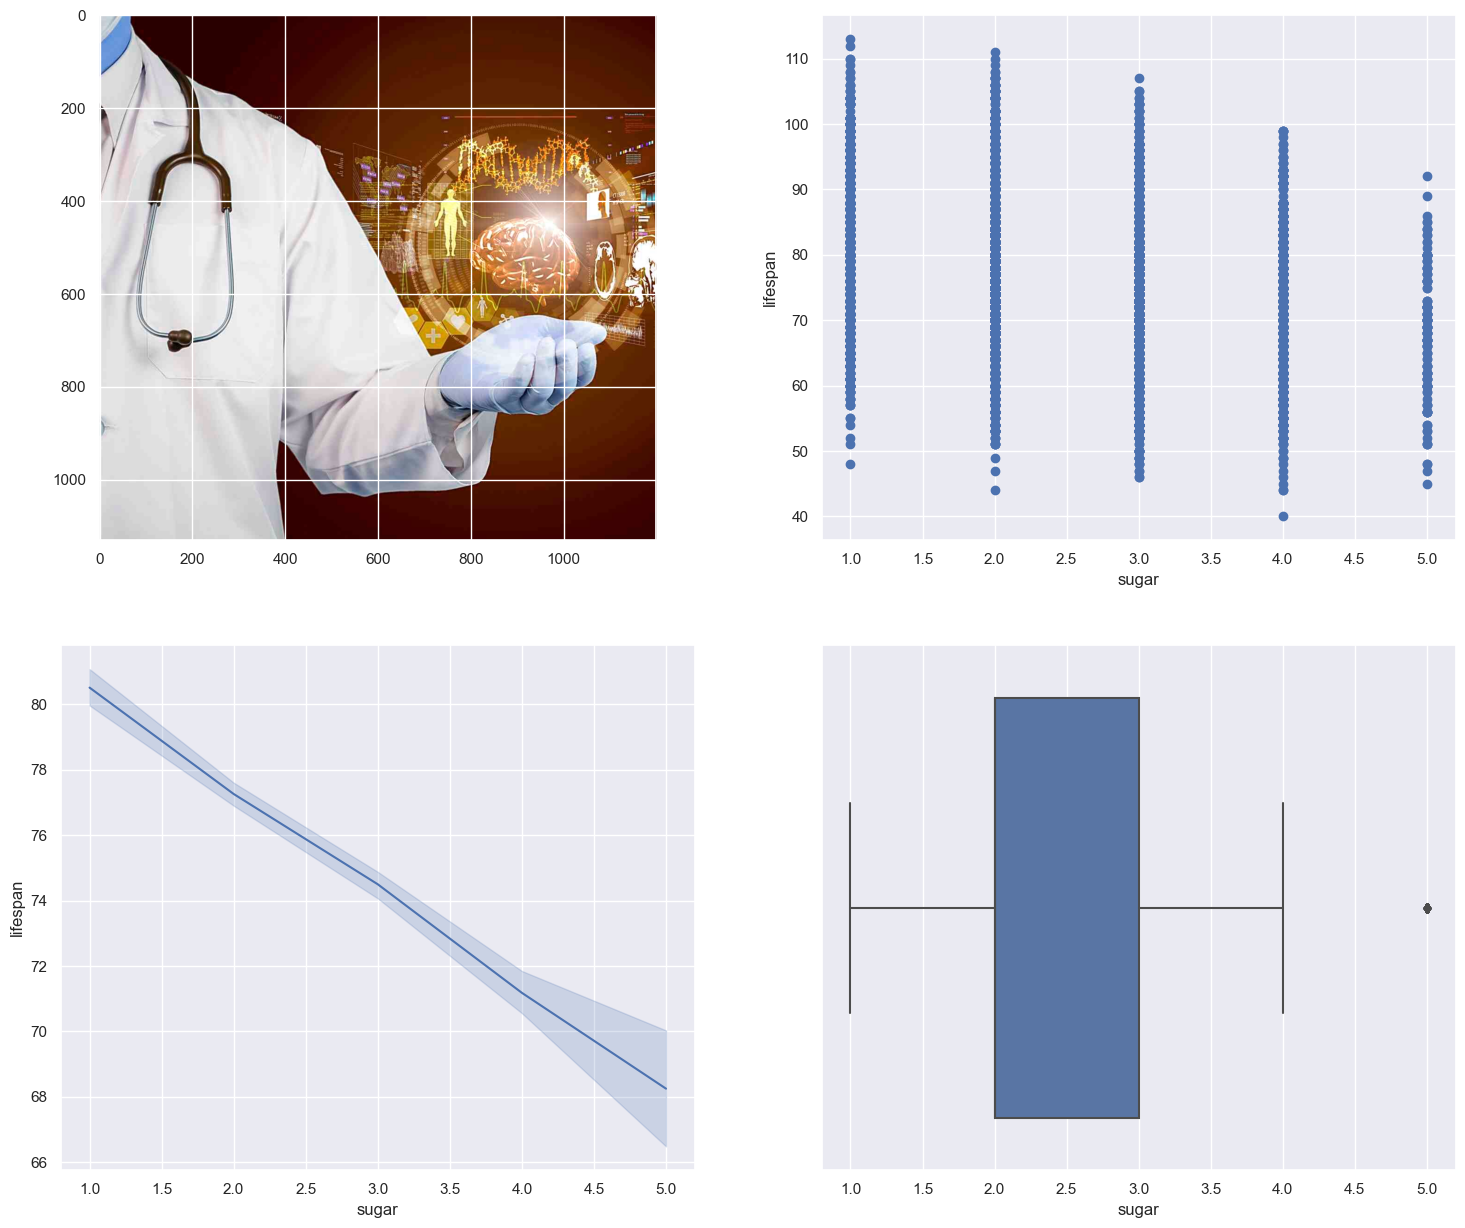

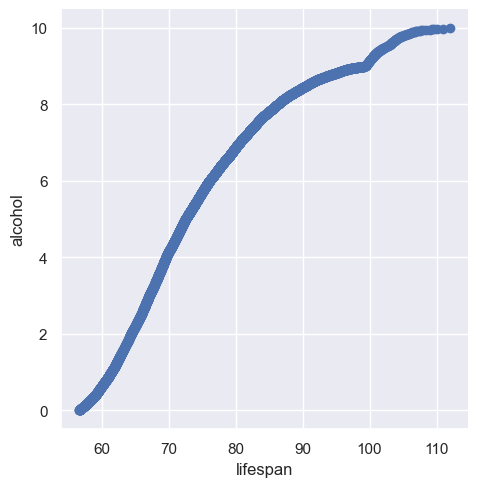

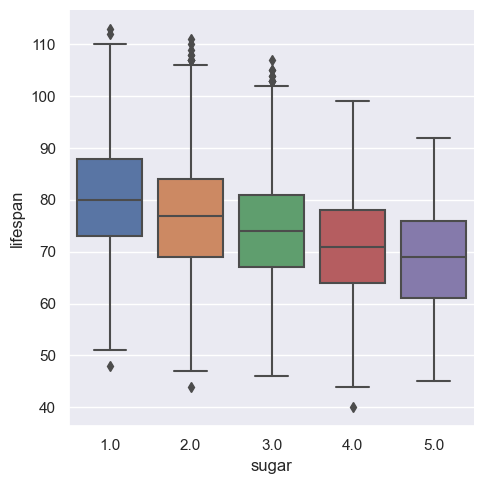

In [88]:
# Maak een raster voor 4 images
import cv2

pImg = cv2.imread("pics/aiHealth_01.jpg")
# pImg = pplot(df, x="lifespan", y="alcohol", kind='qq', height=5)

fig, axs = plt.subplots(2, 2, sharey=False, figsize=(18,15))


axs[0][0].imshow(pImg)
pplot(df, x="lifespan", y="alcohol", kind='qq', height=5)

sns.boxplot(x=df['sugar'], ax=axs[1,1])

axs[0][1].scatter(df['sugar'], df['lifespan'])
axs[0][1].set_xlabel('sugar')
axs[0][1].set_ylabel('lifespan')

sns.catplot(data=df, x='sugar', y='lifespan', kind='box', ax=axs[1,1])

sns.lineplot(x=df['sugar'],y=df['lifespan'], ax=axs[1,0])




plt.show()

# print();

<Axes: xlabel='sugar', ylabel='lifespan'>

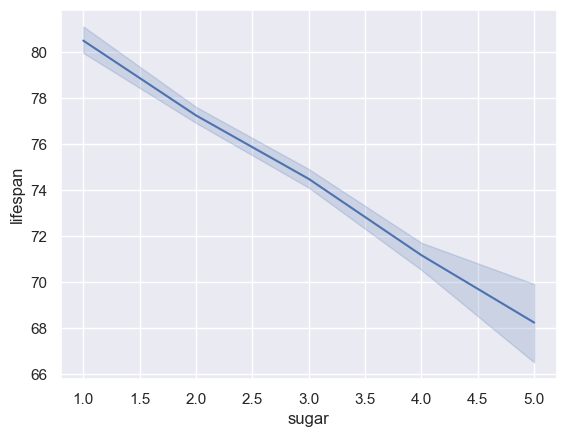

In [46]:
sns.lineplot(df,x='sugar',y='lifespan')


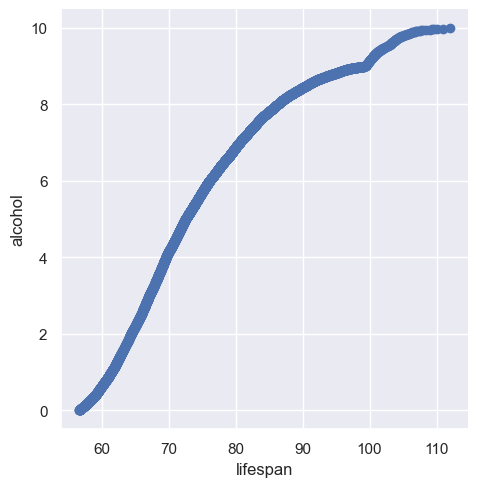

In [45]:
from seaborn_qqplot import pplot
pplot(df, x="lifespan", y="alcohol", kind='qq', height=5)

/tmp/ipykernel_19765/4062243514.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,0.152144,-0.008285
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,0.179911,-0.661776
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,-0.201487,0.726123
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.677365,0.005278
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,-0.525613,0.019498
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.216818,-0.006255
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,-0.263895,0.014230
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,1.000000,-0.276963
bmi,-0.008285,-0.661776,0.726123,0.005278,0.019498,-0.006255,0.014230,-0.276963,1.000000


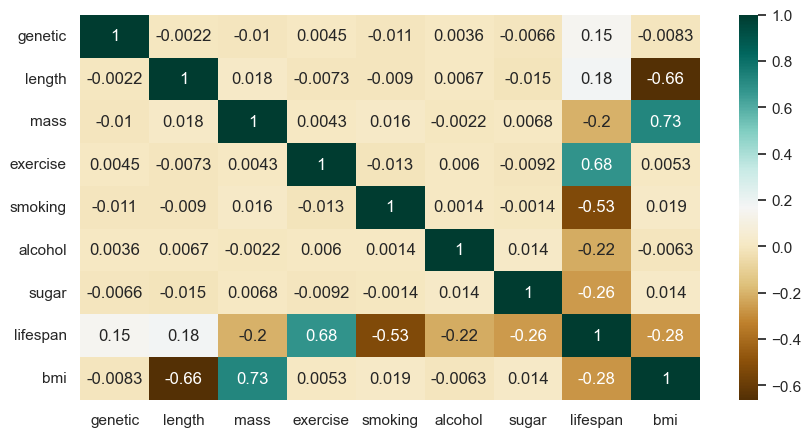

In [89]:


plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c